https://www.kaggle.com/anikannal/solar-power-generation-data

Data is split into train and test based on dates.
AC Power is averaged for every 15 mins and this time series is input to the SARIMAX model in order to forecast the AC Power for future dates.

Analysis Objective:  Able to Predict AC POWER using Time Series method.  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels as sm

In [3]:
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults

In [4]:
import statsmodels.api  as sm

In [5]:
from sklearn.metrics import mean_squared_error , r2_score

In [15]:
## Read in train and test data 
train = pd.read_csv("train_plant2.csv")
test = pd.read_csv("test_plant2.csv")

In [16]:
train.head()

,index,PLANT_ID,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,year,month,dayofweek,day,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001.0,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,2020.0,5.0,4.0,15.0,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:00:00,4136001.0,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,2020.0,5.0,4.0,15.0,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
2,2020-05-15 00:00:00,4136001.0,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,2020.0,5.0,4.0,15.0,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
3,2020-05-15 00:00:00,4136001.0,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,2020.0,5.0,4.0,15.0,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
4,2020-05-15 00:00:00,4136001.0,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,2020.0,5.0,4.0,15.0,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0


In [17]:
test.head()

,index,PLANT_ID,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,year,month,dayofweek,day,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-06-13 00:00:00,4136001.0,4UPUqMRk7TRMgml,0.0,0.0,4548.000000,2.632794e+06,2020.0,6.0,5.0,13.0,iq8k7ZNt4Mwm3w0,23.18443,22.943785,0.0
1,2020-06-13 00:00:00,4136001.0,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215455e+09,2020.0,6.0,5.0,13.0,iq8k7ZNt4Mwm3w0,23.18443,22.943785,0.0
2,2020-06-13 00:00:00,4136001.0,9kRcWv60rDACzjR,0.0,0.0,1564.333333,2.247890e+09,2020.0,6.0,5.0,13.0,iq8k7ZNt4Mwm3w0,23.18443,22.943785,0.0
3,2020-06-13 00:00:00,4136001.0,Et9kgGMDl729KT4,0.0,0.0,3743.000000,1.835361e+06,2020.0,6.0,5.0,13.0,iq8k7ZNt4Mwm3w0,23.18443,22.943785,0.0
4,2020-06-13 00:00:00,4136001.0,IQ2d7wF4YD8zU1Q,0.0,0.0,4802.000000,2.015832e+07,2020.0,6.0,5.0,13.0,iq8k7ZNt4Mwm3w0,23.18443,22.943785,0.0


In [18]:
## set date time index 
train['date'] = pd.to_datetime(train['index'])
test['date'] = pd.to_datetime(test['index'])

In [19]:
train.set_index(['date'], inplace = True)
test.set_index(['date'], inplace = True)

In [20]:
train.shape

(57143, 15)

In [21]:
test.shape

(10560, 15)

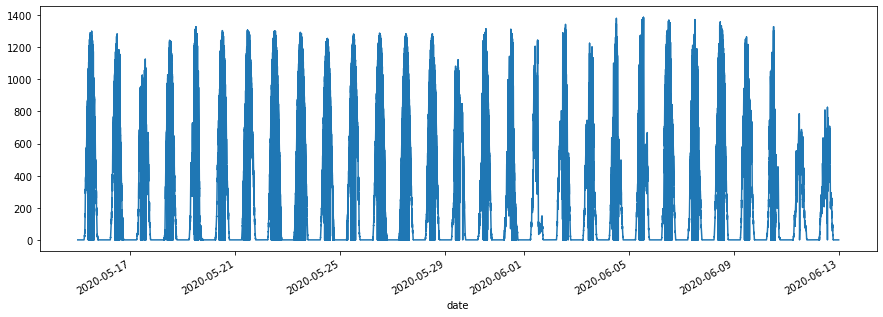

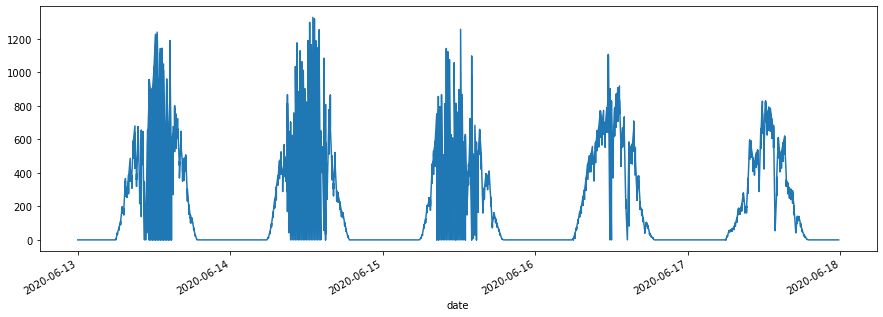

In [23]:
## Plot the train and test AC POWER
plt.figure(figsize = (15,5))
train['AC_POWER'].plot()
plt.figure(figsize = (15,5))
test['AC_POWER'].plot()

Text(0.5, 1.0, 'Quartlerly Hour Mean Power ')

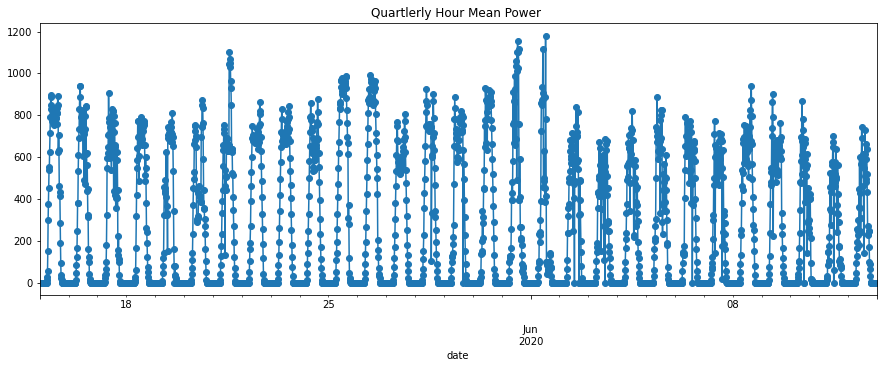

In [24]:
## Do you spot a trend in the train data ?? 
plt.figure(figsize = (15,5))
train.resample('15Min')['AC_POWER'].mean().plot(style = '-o')
plt.title("Quartlerly Hour Mean Power ")

Text(0.5, 1.0, 'Mean Daily AC Power')

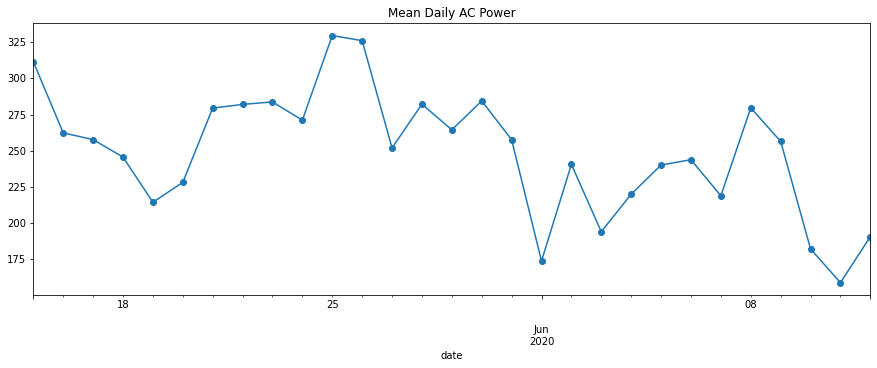

In [25]:
## Do you spot a trend in the train data ?? 
plt.figure(figsize = (15,5))
train.resample('D')['AC_POWER'].mean().plot(style = '-o')
plt.title("Mean Daily AC Power")

Text(0.5, 1.0, 'Total Daily AC Power')

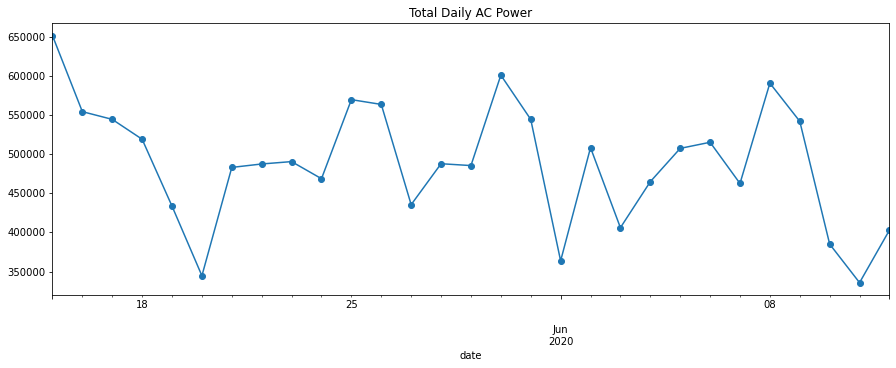

In [26]:
plt.figure(figsize = (15,5))
train.resample('D')['AC_POWER'].sum().plot(style = '-o')
plt.title("Total Daily AC Power")

Text(0.5, 1.0, 'Total half hourly AC Power')

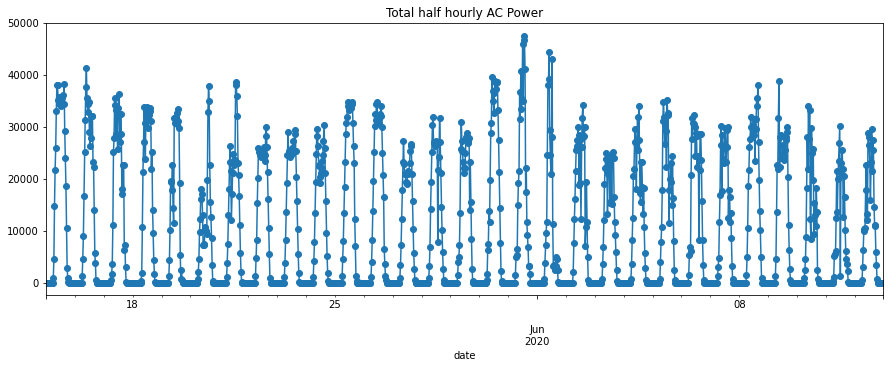

In [27]:
plt.figure(figsize = (15,5))
train.resample('30Min')['AC_POWER'].sum().plot(style = '-o')
plt.title("Total half hourly AC Power")

Text(0.5, 1.0, 'Mean Half hourly  AC Power')

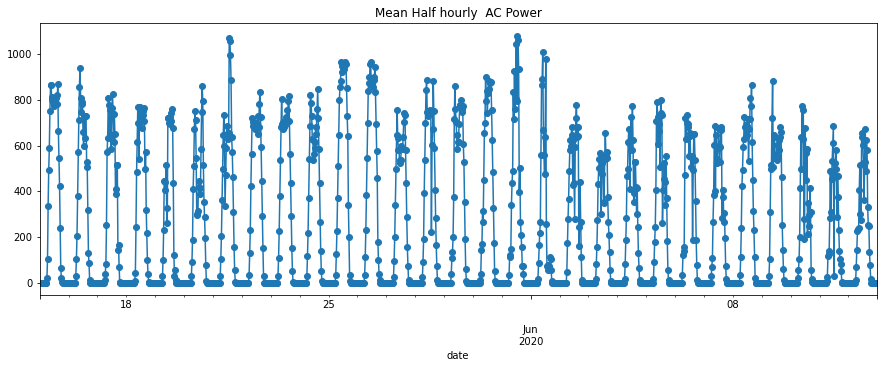

In [28]:
plt.figure(figsize = (15,5))
train.resample('30Min')['AC_POWER'].mean().plot(style = '-o')
plt.title("Mean Half hourly  AC Power")

Text(0.5, 1.0, ' AC Power for a day ')

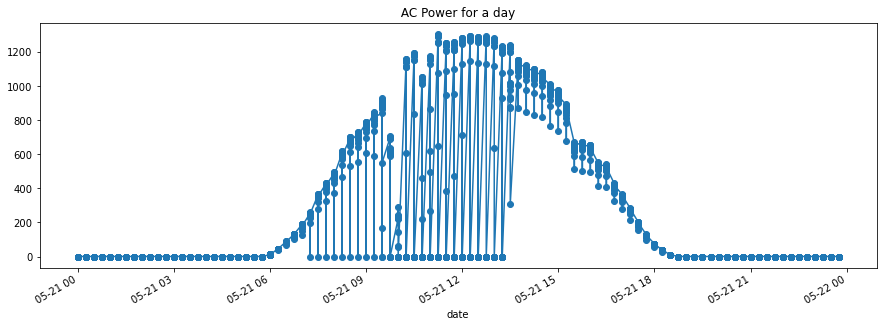

In [33]:
## Plot the AC Power for a day 
plt.figure(figsize = (15,5))
train['2020-05-21']['AC_POWER'].plot(style = '-o')
plt.title(" AC Power for a day ")

In [34]:
##  Mean 15 minutely AC Power
train_acp = train.resample('15Min')['AC_POWER'].mean()
train_acp

date
2020-05-15 00:00:00    0.0
2020-05-15 00:15:00    0.0
2020-05-15 00:30:00    0.0
2020-05-15 00:45:00    0.0
2020-05-15 01:00:00    0.0
                      ... 
2020-06-12 22:45:00    0.0
2020-06-12 23:00:00    0.0
2020-06-12 23:15:00    0.0
2020-06-12 23:30:00    0.0
2020-06-12 23:45:00    0.0
Freq: 15T, Name: AC_POWER, Length: 2784, dtype: float64

In [35]:
test_acp = test.resample('15Min')['AC_POWER'].mean()
test_acp

date
2020-06-13 00:00:00    0.0
2020-06-13 00:15:00    0.0
2020-06-13 00:30:00    0.0
2020-06-13 00:45:00    0.0
2020-06-13 01:00:00    0.0
                      ... 
2020-06-17 22:45:00    0.0
2020-06-17 23:00:00    0.0
2020-06-17 23:15:00    0.0
2020-06-17 23:30:00    0.0
2020-06-17 23:45:00    0.0
Freq: 15T, Name: AC_POWER, Length: 480, dtype: float64

Text(0.5, 1.0, 'Test data ')

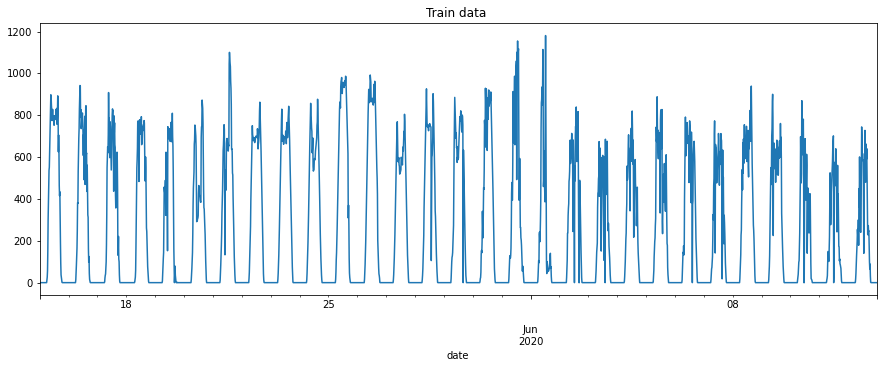

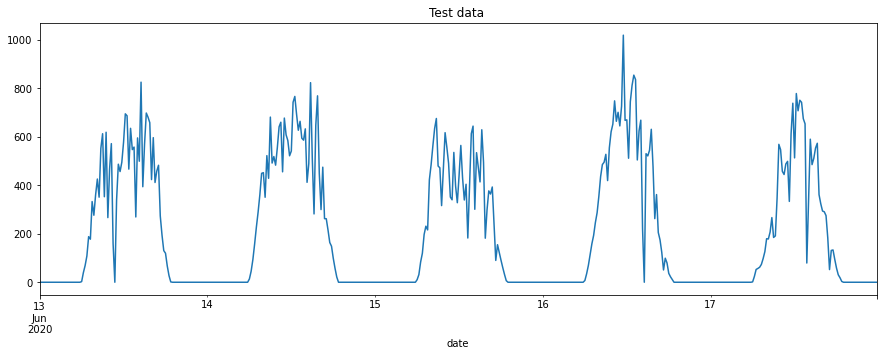

In [36]:
## Plot train and test AC POWER
plt.figure(figsize = (15,5))
train_acp.plot()
plt.title("Train data ")
##
plt.figure(figsize = (15,5))
test_acp.plot()
plt.title("Test data ")

In [37]:
train_acp.isnull().sum()


0

In [38]:
test_acp.isnull().sum()

0

In [39]:
## Check for Stationarity of the time series 
result = adfuller(train_acp, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(train_acp, regression='ct')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -13.103390777777063
p-value: 1.6917502995897235e-24
Critial Values:
   1%, -3.432725827000873
Critial Values:
   5%, -2.862589670460055
Critial Values:
   10%, -2.5673287729948187

KPSS Statistic: 0.017170
p-value: 0.100000
Critial Values:
   10%, 0.119
Critial Values:
   5%, 0.146
Critial Values:
   2.5%, 0.176
Critial Values:
   1%, 0.216


/Users/anushabanninthaya/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/Users/anushabanninthaya/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


Null hypothesis : The time series is non stationary or has a unit root.  
Alternate hypothesis : The time series is stationary.  

The p value for the ADF statistic is less than the threshold of 0.05 , hence reject the null hypothesis.  
The time series is stationary and does not have time dependent structures.Also a negative value of ADF Statistic stands for stationary time series.   

<Figure size 1080x360 with 0 Axes>

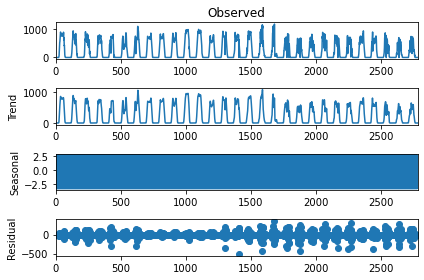

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
## Seasonal decompose 
plt.figure(figsize = (15,5))
seasonal_decompose(train_acp.values , period = 4).plot(); ## Since the function gave an error for Freq of 'T', 
## the work around is set the period to 4 (4 periods for an hour) and pass an array to the function.


No trend observed.

In [41]:
from pandas.plotting import autocorrelation_plot

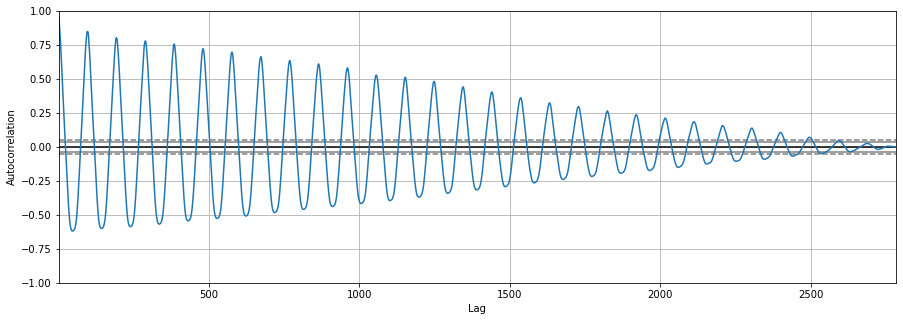

In [42]:
plt.figure(figsize = (15,5))
autocorrelation_plot(train_acp)

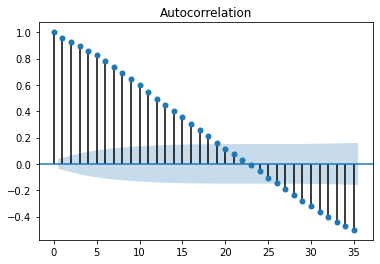

In [43]:
plot_acf(train_acp);

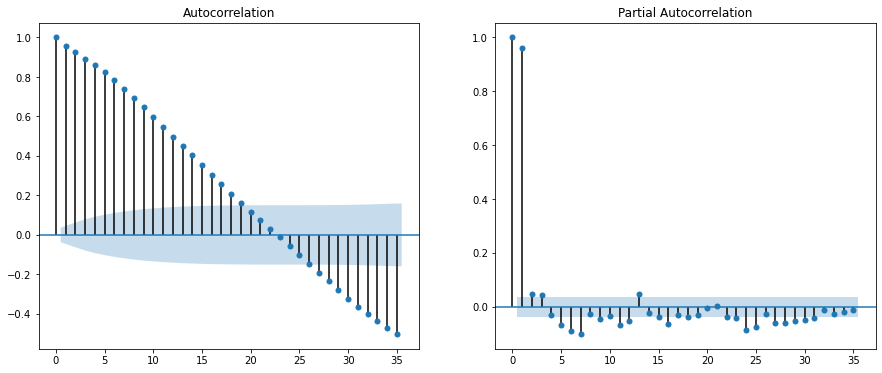

In [44]:
## Check the auto correlation in the series 
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15, 6))
#autocorr = acf(differenced.values) # just the numbers
plot_acf(train_acp.values, ax=ax[0]); # just the plot
plot_pacf(train_acp.values, ax=ax[1]); # just the plot

AR term - lag order is determined from pacf plot.(p) Number of lags that are above the significance level   
MA term - number of lags that are above the significance level in autocorrelation plot of stationary series.(q)  
Diff term - number of differencing required to make the series stationary(d)  

p = 1 or 2.
d = 0. 
q = can be 1 to 5.

### SARIMAX

In [45]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [46]:
order = (1,0,1)
sorder = (1,0,1,96)
trend = 'n'
model = SARIMAX(train_acp, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
    # fit model
model_fit = model.fit(disp=False)
    # make one step forecast
yhat = model_fit.predict(len(train_acp), len(train_acp))
    

In [47]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           AC_POWER   No. Observations:                 2784
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 96)   Log Likelihood              -15698.123
Date:                            Wed, 03 Nov 2021   AIC                          31406.246
Time:                                    22:34:32   BIC                          31435.725
Sample:                                05-15-2020   HQIC                         31416.909
                                     - 06-12-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7684      0.009     81.536      0.000       0.750       0.787
ma.L1         -0.0730      0.011     -6.392      0.000      -0.095      -0.051
ar.S.L96       0.9866      0.001    916.251      0.000       0.984       0.989
ma.S.L96      -1.0000      0.010    -95.458      0.000      -1.021      -0.979
sigma2      6192.8433   1.69e-06   3.66e+09      0.000    6192.843    6192.843
===================================================================================
Ljung-Box (Q):                       97.64   Jarque-Bera (JB):             31775.90
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.38   Skew:                            -0.81
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.49e+23. Standard errors may be unstable.
"""

Text(0.5, 1.0, 'AC Power')

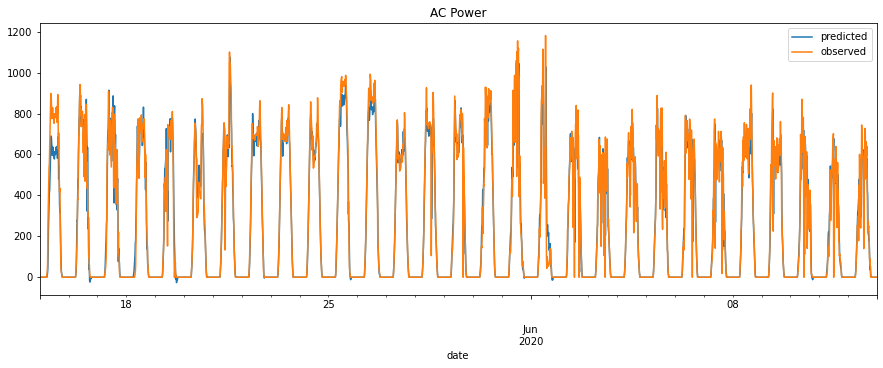

In [48]:
plt.figure(figsize = (15,5))
model_fit.predict(5).plot(label = 'predicted')
train_acp.plot(label = 'observed')
plt.legend()
plt.title("AC Power")


In [49]:
res = model.filter(model_fit.params)
# In-sample one-step-ahead predictions
predict = res.get_prediction(start = '2020-06-13' , end = '2020-06-14')
predict_ci = predict.conf_int()


In [50]:
# Dynamic predictions
predict_dy = res.get_prediction(start = '2020-06-13' , end = '2020-06-14', dynamic=True)
predict_dy_ci = predict_dy.conf_int()

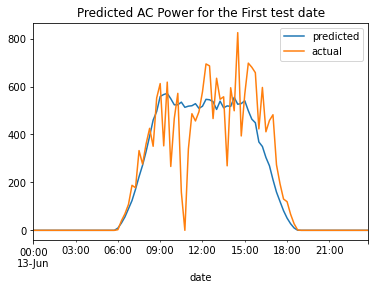

In [51]:
predict.predicted_mean.loc['2020-06-13'].plot(label = 'predicted')
test_acp['2020-06-13'].plot(label = 'actual')
plt.title("Predicted AC Power for the First test date")
plt.legend()

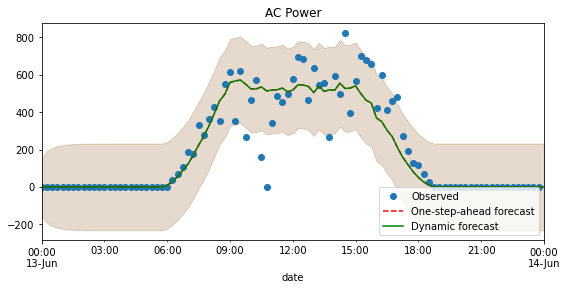

In [52]:
# Graph
fig, ax = plt.subplots(figsize=(9,4))
npre = 4
ax.set(title='AC Power', xlabel='Date')

# Plot data points
test_acp['2020-06-13'].plot(ax=ax, style='o', label='Observed')

# Plot predictions
predict.predicted_mean.loc['2020-06-13':].plot(ax=ax, style='r--', label='One-step-ahead forecast')
ci = predict_ci.loc['2020-06-13':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='r', alpha=0.1)
predict_dy.predicted_mean.loc['2020-06-13':].plot(ax=ax, style='g', label='Dynamic forecast')
ci = predict_dy_ci.loc['2020-06-13':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='g', alpha=0.1)

legend = ax.legend(loc='lower right')

In [53]:
print("rmse :{}".format(mean_squared_error(predict_dy.predicted_mean.loc['2020-06-13'], test_acp['2020-06-13'] , squared = False)))

rmse :112.04182200190287


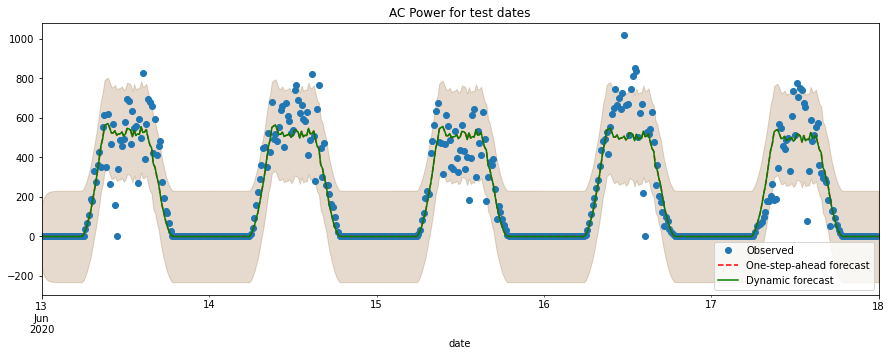

In [54]:
## Get predictions for all the test set dates 
res = model.filter(model_fit.params)
# In-sample one-step-ahead predictions
predict = res.get_prediction(start = '2020-06-13' , end = '2020-06-18')
predict_ci = predict.conf_int()
###
# Dynamic predictions
predict_dy = res.get_prediction(start = '2020-06-13' , end = '2020-06-18', dynamic=True)
predict_dy_ci = predict_dy.conf_int()
## plot the graph
# Graph
fig, ax = plt.subplots(figsize=(15,5))
npre = 4
ax.set(title='AC Power for test dates', xlabel='Date')

# Plot data points
test_acp.plot(ax=ax, style='o', label='Observed')

# Plot predictions
predict.predicted_mean.loc['2020-06-13':].plot(ax=ax, style='r--', label='One-step-ahead forecast')
ci = predict_ci.loc['2020-06-13':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='r', alpha=0.1)
predict_dy.predicted_mean.loc['2020-06-13':].plot(ax=ax, style='g', label='Dynamic forecast')
ci = predict_dy_ci.loc['2020-06-13':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='g', alpha=0.1)

legend = ax.legend(loc='lower right')

In [55]:
## RMSE for the entire forecast
print("rmse :{}".format(mean_squared_error(predict_dy.predicted_mean.loc['2020-06-13': '2020-06-17'], test_acp , squared = False)))

rmse :104.91980393736974


In [56]:
print("R2 :{}".format(r2_score(predict_dy.predicted_mean.loc['2020-06-13': '2020-06-17'], test_acp )))

R2 :0.7892321361893812


RMSE for 13th June : 112.04182200190289


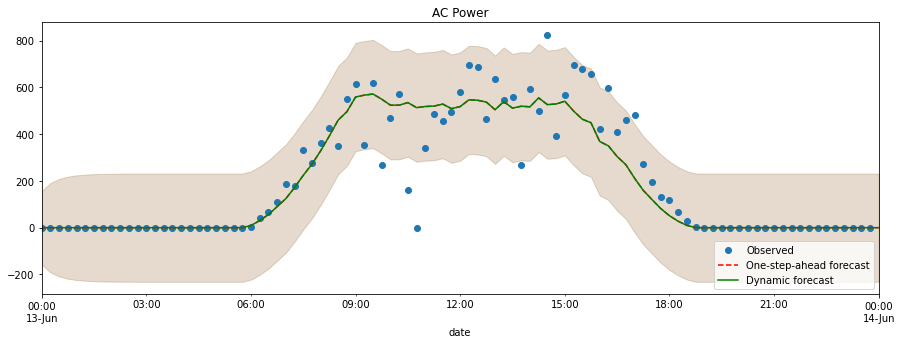

In [58]:
## Check for single day forecast 
## Get predictions for the test set dates 
res = model.filter(model_fit.params)
# In-sample one-step-ahead predictions
predict = res.get_prediction(start = '2020-06-13' , end = '2020-06-14')
predict_ci = predict.conf_int()
###
# Dynamic predictions
predict_dy = res.get_prediction(start = '2020-06-13' , end = '2020-06-14', dynamic=True)
predict_dy_ci = predict_dy.conf_int()
## plot the graph
# Graph
fig, ax = plt.subplots(figsize=(15,5))
npre = 4
ax.set(title='AC Power', xlabel='Date')

# Plot data points
test_acp['2020-06-13'].plot(ax=ax, style='o', label='Observed')

# Plot predictions
predict.predicted_mean.loc['2020-06-13':].plot(ax=ax, style='r--', label='One-step-ahead forecast')
ci = predict_ci.loc['2020-06-13':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='r', alpha=0.1)
predict_dy.predicted_mean.loc['2020-06-13':].plot(ax=ax, style='g', label='Dynamic forecast')
ci = predict_dy_ci.loc['2020-06-13':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='g', alpha=0.1)

legend = ax.legend(loc='lower right')

## 
se = (test_acp['2020-06-13'] - predict_dy.predicted_mean['2020-06-13'])**2
mse = se.mean()
rmse = np.sqrt(mse)
print("RMSE for 13th June : {}".format(rmse))

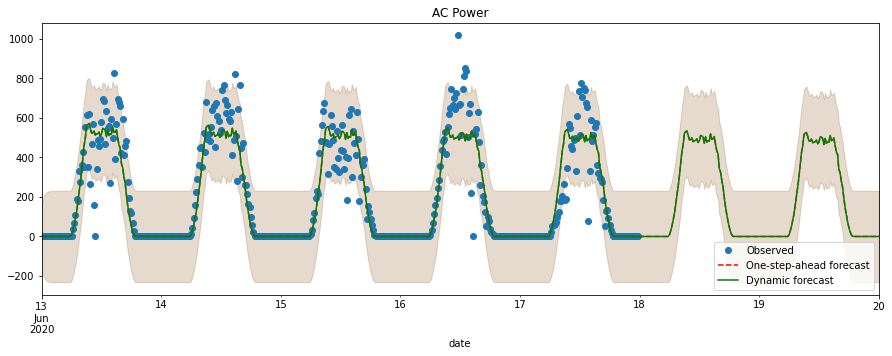

In [59]:
## Predict for future 2  days of June 18th - 19th 

## Get predictions for future dates 
res = model.filter(model_fit.params)
# In-sample one-step-ahead predictions
predict = res.get_prediction(start = '2020-06-13' , end = '2020-06-20')
predict_ci = predict.conf_int()
###
# Dynamic predictions
predict_dy = res.get_prediction(start = '2020-06-13' , end = '2020-06-20', dynamic=True)
predict_dy_ci = predict_dy.conf_int()
## plot the graph
# Graph
fig, ax = plt.subplots(figsize=(15,5))
npre = 4
ax.set(title='AC Power', xlabel='Date')

# Plot data points
test_acp.plot(ax=ax, style='o', label='Observed')

# Plot predictions
predict.predicted_mean.loc['2020-06-13':].plot(ax=ax, style='r--', label='One-step-ahead forecast')
ci = predict_ci.loc['2020-06-13':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='r', alpha=0.1)
predict_dy.predicted_mean.loc['2020-06-13':].plot(ax=ax, style='g', label='Dynamic forecast')
ci = predict_dy_ci.loc['2020-06-13':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='g', alpha=0.1)

legend = ax.legend(loc='lower right')

Change the SARIMAX parameters and check the prediction.

/Users/anushabanninthaya/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


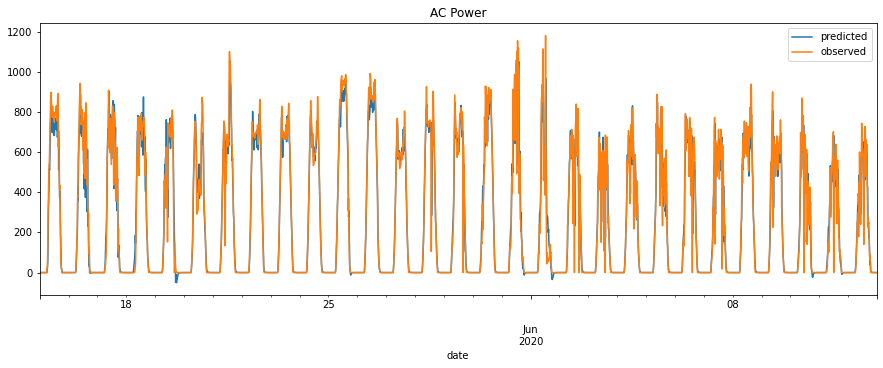

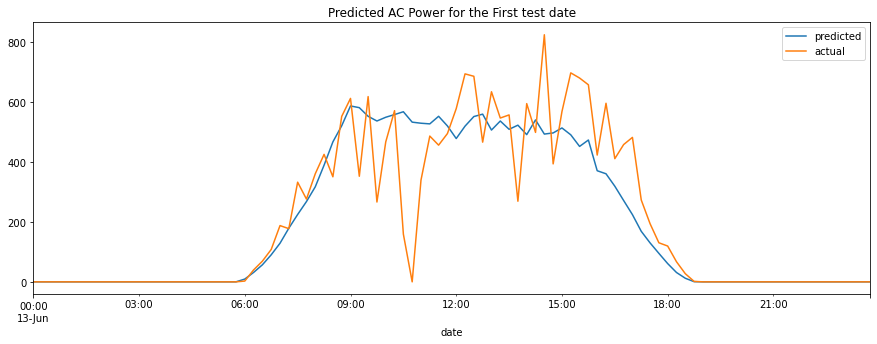

In [60]:
order = (2,0,2)
sorder = (2,0,2,96)
trend = 'n'
model = SARIMAX(train_acp, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
    # fit model
model_fit = model.fit(disp=False)
    # make one step forecast
yhat = model_fit.predict(len(train_acp), len(train_acp))
##
model_fit.summary()
##
plt.figure(figsize = (15,5))
model_fit.predict(5).plot(label = 'predicted')
train_acp.plot(label = 'observed')
plt.legend()
plt.title("AC Power")
##
res = model.filter(model_fit.params)
# In-sample one-step-ahead predictions
predict = res.get_prediction(start = '2020-06-13' , end = '2020-06-14')
predict_ci = predict.conf_int()
##
# Dynamic predictions
predict_dy = res.get_prediction(start = '2020-06-13' , end = '2020-06-14', dynamic=True)
predict_dy_ci = predict_dy.conf_int()
##
plt.figure(figsize = (15,5))
predict.predicted_mean.loc['2020-06-13'].plot(label = 'predicted')
test_acp['2020-06-13'].plot(label = 'actual')
plt.title("Predicted AC Power for the First test date")
plt.legend()

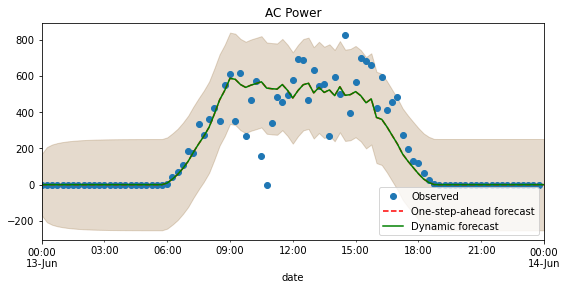

In [61]:
# Graph
fig, ax = plt.subplots(figsize=(9,4))
npre = 4
ax.set(title='AC Power', xlabel='Date')

# Plot data points
test_acp['2020-06-13'].plot(ax=ax, style='o', label='Observed')

# Plot predictions
predict.predicted_mean.loc['2020-06-13':].plot(ax=ax, style='r--', label='One-step-ahead forecast')
ci = predict_ci.loc['2020-06-13':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='r', alpha=0.1)
predict_dy.predicted_mean.loc['2020-06-13':].plot(ax=ax, style='g', label='Dynamic forecast')
ci = predict_dy_ci.loc['2020-06-13':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='g', alpha=0.1)

legend = ax.legend(loc='lower right')

In [62]:
print("rmse :{}".format(mean_squared_error(predict_dy.predicted_mean.loc['2020-06-13'], test_acp['2020-06-13'] , squared = False)))

rmse :115.25869013406425


RMSE for the above SARIMAX model is more than that for the model with order (1,0,1)(1,0,1).  

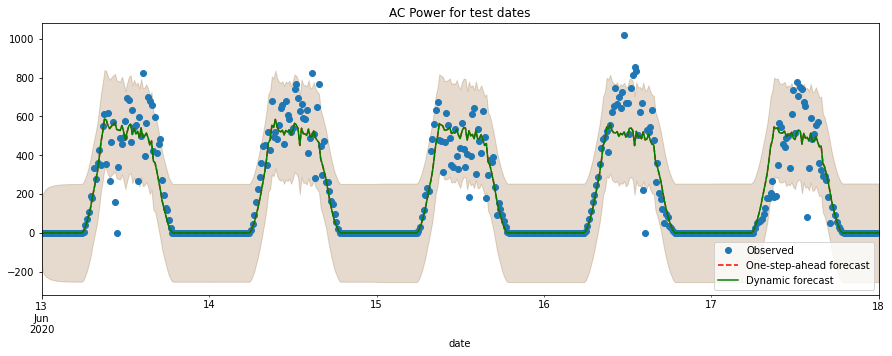

In [63]:
## Get predictions for all the test set dates 
res = model.filter(model_fit.params)
# In-sample one-step-ahead predictions
predict = res.get_prediction(start = '2020-06-13' , end = '2020-06-18')
predict_ci = predict.conf_int()
###
# Dynamic predictions
predict_dy = res.get_prediction(start = '2020-06-13' , end = '2020-06-18', dynamic=True)
predict_dy_ci = predict_dy.conf_int()
## plot the graph
# Graph
fig, ax = plt.subplots(figsize=(15,5))
npre = 4
ax.set(title='AC Power for test dates', xlabel='Date')

# Plot data points
test_acp.plot(ax=ax, style='o', label='Observed')

# Plot predictions
predict.predicted_mean.loc['2020-06-13':].plot(ax=ax, style='r--', label='One-step-ahead forecast')
ci = predict_ci.loc['2020-06-13':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='r', alpha=0.1)
predict_dy.predicted_mean.loc['2020-06-13':].plot(ax=ax, style='g', label='Dynamic forecast')
ci = predict_dy_ci.loc['2020-06-13':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='g', alpha=0.1)

legend = ax.legend(loc='lower right')

In [64]:
## RMSE for the entire test set.
print("rmse :{}".format(mean_squared_error(predict_dy.predicted_mean.loc['2020-06-13': '2020-06-17'], test_acp , squared = False)))

rmse :105.21045459802191


In [65]:
print("R2 :{}".format(r2_score(predict_dy.predicted_mean.loc['2020-06-13': '2020-06-17'], test_acp )))

R2 :0.7894822326108757


RMSE for 13th June : 115.25869013406425


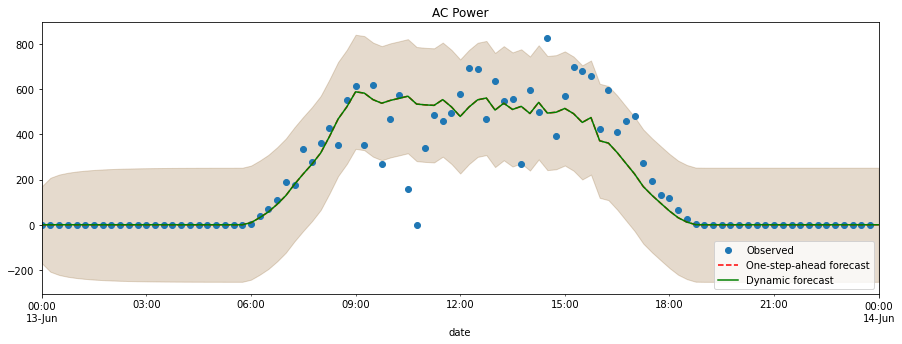

In [66]:
## Check for single day forecast 
## Get predictions for the test set dates 
res = model.filter(model_fit.params)
# In-sample one-step-ahead predictions
predict = res.get_prediction(start = '2020-06-13' , end = '2020-06-14')
predict_ci = predict.conf_int()
###
# Dynamic predictions
predict_dy = res.get_prediction(start = '2020-06-13' , end = '2020-06-14', dynamic=True)
predict_dy_ci = predict_dy.conf_int()
## plot the graph
# Graph
fig, ax = plt.subplots(figsize=(15,5))
npre = 4
ax.set(title='AC Power', xlabel='Date')

# Plot data points
test_acp['2020-06-13'].plot(ax=ax, style='o', label='Observed')

# Plot predictions
predict.predicted_mean.loc['2020-06-13':].plot(ax=ax, style='r--', label='One-step-ahead forecast')
ci = predict_ci.loc['2020-06-13':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='r', alpha=0.1)
predict_dy.predicted_mean.loc['2020-06-13':].plot(ax=ax, style='g', label='Dynamic forecast')
ci = predict_dy_ci.loc['2020-06-13':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='g', alpha=0.1)

legend = ax.legend(loc='lower right')

## 
se = (test_acp['2020-06-13'] - predict_dy.predicted_mean['2020-06-13'])**2
mse = se.mean()
rmse = np.sqrt(mse)
print("RMSE for 13th June : {}".format(rmse))

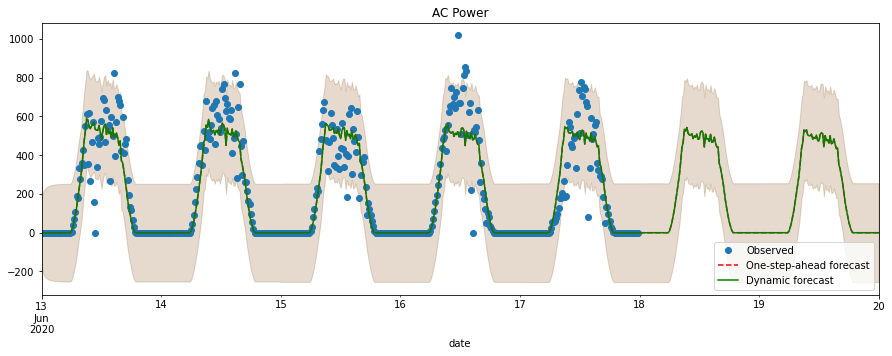

In [67]:
## Predict for future 2  days of June 18th - 19th 

## Get predictions for future dates 
res = model.filter(model_fit.params)
# In-sample one-step-ahead predictions
predict = res.get_prediction(start = '2020-06-13' , end = '2020-06-20')
predict_ci = predict.conf_int()
###
# Dynamic predictions
predict_dy = res.get_prediction(start = '2020-06-13' , end = '2020-06-20', dynamic=True)
predict_dy_ci = predict_dy.conf_int()
## plot the graph
# Graph
fig, ax = plt.subplots(figsize=(15,5))
npre = 4
ax.set(title='AC Power', xlabel='Date')

# Plot data points
test_acp.plot(ax=ax, style='o', label='Observed')

# Plot predictions
predict.predicted_mean.loc['2020-06-13':].plot(ax=ax, style='r--', label='One-step-ahead forecast')
ci = predict_ci.loc['2020-06-13':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='r', alpha=0.1)
predict_dy.predicted_mean.loc['2020-06-13':].plot(ax=ax, style='g', label='Dynamic forecast')
ci = predict_dy_ci.loc['2020-06-13':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='g', alpha=0.1)

legend = ax.legend(loc='lower right')

Summary:    
SARIMAX model with (1,0,1,(1,0,1)) parameters has a R2 of 0.789.  
The predicted AC Power is off by 105 units for the test dates.  
For the future dates of June 18th and June 19th , the model predcits 15Minutes average AC Power between 6am and 18pm , with peak value @600 units.